In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import random
import copy

ind_num = 20 #一世代の個体数
gen_num = 1000 #目標の世代数
co_method_num = 0 #交叉の方法
selection_method_num = 0 #淘汰の方法
mutation_probability = 0.1 #突然変異の確率
point_num = 5




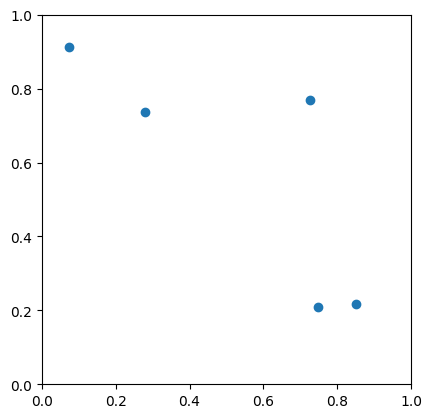

In [13]:
point_num = 5 #巡回するポイントの数
#point_list = list(range(point_num))
xPos = np.random.rand(point_num)#ポイントの数だけランダムな座標を生成
yPos = np.random.rand(point_num)
#print(xPos,"\n", yPos)

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(xPos, yPos, marker = "o", linestyle = "none")#生成した座標の点のみ描画
ax.set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)

coordinate = np.transpose(np.stack([xPos, yPos]))
#print(coordinate)
#print(coordinate[1])

In [9]:
class Individual:
  coordinate = 0
  point_num = 0

  def __init__(self, input=0):
    if input == 0:
      self.chromosome = list(range(Individual.point_num))
      random.shuffle(self.chromosome)
    else:
      self.chromosome = input
    self.getFitness()
    #print(self.chromosome)

  def setDefaultCoordinate(self, input):
    Individual.coordinate = copy.deepcopy(input)
  
  def setChromosome(self, input):
    self.chromosome = input

  def getFitness(self):
    self.fitness = 0
    self.temp = []
    for j in range(len(self.chromosome)):
      self.temp.append(Individual.coordinate[self.chromosome[j]])
    #print(self.temp)
    #print(self.coordinate)

    for i in range(len(self.temp)):
      a=self.temp[i]
      if i == len(self.temp)-1:
        b=self.temp[0]
      else:
        b=self.temp[i+1]
      distance=np.linalg.norm(b-a)
      self.fitness += distance
    #print(self.fitness)

  def getChromosomse(self):
    return_chromo = copy.deepcopy(self.chromosome)
    return return_chromo

In [6]:
def mutation_2(ind):
  new_chromo = copy.deepcopy(ind.chromosome)
  r1 = random.randint(0, len(ind.chromosome) -1)
  r2 = random.randint(0, len(ind.chromosome) -1)
  while r1 == r2:
    r2 = random.randint(0, len(ind.chromosome) -1)

  #print(r1,r2)
  temp = new_chromo[r1]
  new_chromo[r1] = new_chromo[r2]
  new_chromo[r2] = temp
  ind.setChromosome(new_chromo)
  
def mutation_ALL(ind):#壊れすぎてダメかも
  new_chromo = list(range(len(ind.chromosome)))
  random.shuffle(new_chromo)
  ind.setChromosome(new_chromo)


In [22]:
Individual.point_num = point_num
Individual.coordinate = copy.deepcopy(coordinate)
test_ind = Individual()
print(test_ind.chromosome)
print(test_ind.fitness)

mutation_ALL(test_ind)

test_ind.getFitness()
print(test_ind.chromosome)
print(test_ind.fitness)

[1, 4, 3, 2, 0]
3.6812773527061973
[3, 1, 2, 4, 0]
2.4216349483356057
